# Preprocessing 
We will be exploring how to prepocess tweets for sentiment analysis.

# Setup
We will be using the NLTK (Natural Language Toolkit) package.


In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt 
import random

In [2]:
# Downloads sample twitter dataset
nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/emre/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
# Select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings("positive_tweets.json")
all_negative_tweets = twitter_samples.strings("negative_tweets.json")

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


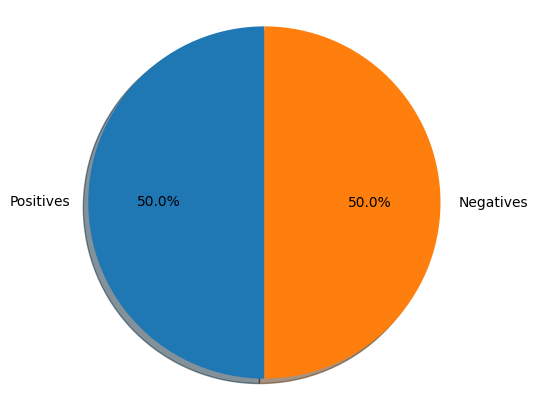

In [5]:
# Declare figure size
fig = plt.figure(figsize=(5 ,5))

# labels for classes
labels = "Positives", "Negatives"

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

# Looking at raw texts

In [6]:
# print positive 
print("Positive : " +  all_positive_tweets[random.randint(0,5000)])

# print negative 
print("Negative : " + all_negative_tweets[random.randint(0,5000)])

Positive : @babypuffinator i've typed worse things, it's all good :p
Negative : Valentine et al (2009) found relationships between homo/biphobic comments &amp; certain disciplines- incl. European languages, lit, education :(


## Preprocess raw text for sentiment analysis
* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

In [7]:
# Select sample. Complect enough to exrmplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [8]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/emre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

# Remove hyperlinks,  Twitter marks and styles.

Remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks.

In [10]:
print(tweet)

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
print(tweet2)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
print(tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


# Tokenize the string

In [11]:
print(tweet2)

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print("Tokenized string : ")
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
Tokenized string : 
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


# Remove stop words and punctuations


In [12]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words :')
print(stopwords_english)

print('\nPunctuation : ')
print(string.punctuation)

Stop words :
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [13]:
tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


# Stemming
Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

In [14]:
# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem =[]

for word in tweets_clean:
    stem_word = stemmer.stem(word) #stemming word
    tweets_stem.append(stem_word) #append to the list

print("Stemmed words : ")
print(tweets_stem)


Stemmed words : 
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


# process_tweet()

In [15]:
from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = all_positive_tweets[2277]

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
